In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
data = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [46]:
data.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


Data Cleansing

In [47]:
data.shape

(5020, 8)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [49]:
data.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [50]:
data.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [51]:
data.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [52]:
data['Date'] = pd.to_datetime(data['Date'])
data['Qty'] = pd.to_numeric(data['Qty'], errors='coerce')
data = data.dropna(subset=['Qty'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_7724\962927025.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [54]:
data_gabung = data.groupby('Date')['Qty'].sum().reset_index()

In [55]:
data_gabung.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


In [56]:
data_gabung = data_gabung.set_index('Date')

In [69]:
data_gabung.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


In [61]:
model = SARIMAX(data_gabung, order=(1, 0, 0), seasonal_order=(1, 0, 0, 7))
model_fit = model.fit()

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [63]:
forecast_steps = 30 # jumlah langkah yang akan diprediksi ke depan
forecast = model_fit.forecast(steps=forecast_steps) # prediksi berdasarkan model yang dilatih

last_date = data_gabung.index[-1] # tanggal terakhir dari data historis
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]


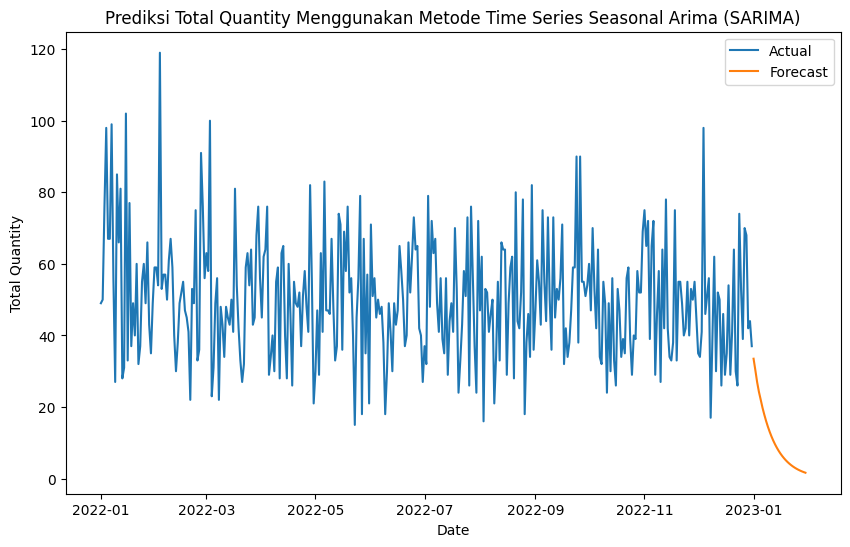

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(data_gabung.index, data_gabung['Qty'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Prediksi Total Quantity Menggunakan Metode Time Series Seasonal Arima (SARIMA)')
plt.legend()
plt.show()